# Case study forecasts analysis

Analysis of the forecasts used in case study. Results used in written document

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from copy import deepcopy

In [2]:
df_naive = pd.read_excel('../forecast_analysis/naive_results.xlsx')
df_naive.iloc[:, 0] = pd.to_datetime(df_naive.iloc[:, 0])
df_naive.index = df_naive.iloc[:, 0]  # Change the col to index with datetimes, instead of integers!
df_naive.drop('Unnamed: 0', axis=1, inplace=True)


Remove the too small actual values, to not affect MAPE values too much

In [3]:
def remove_small_actuals(df, lower_bound=-1, upper_bound=1):
    df= deepcopy(df)
    rule_small=(df.actual<upper_bound) & (df.actual>=0) | (df.actual>lower_bound) & (df.actual<0)
    
    
    removable_idx = df.actual.loc[rule_small].index
    df.drop(removable_idx, inplace=True)
    
    return df

In [4]:
# df_naive_reduced = remove_small_actuals(df_naive)

### A small sample, to see the visual effect of fitted forecasts

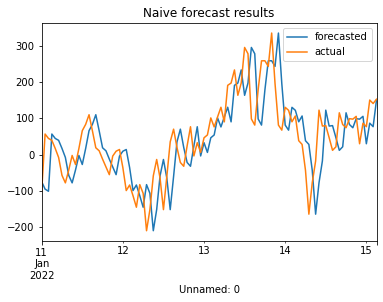

In [5]:
df_naive.iloc[9000:9100,0].plot(label='forecasted')
df_naive.iloc[9000:9100, 1].plot(label='actual')
plt.legend()
plt.title('Naive forecast results')
plt.show()

In [6]:
def calculate_directional_accuracy(df):
    
    correct = 0
    for i in range(len(df)):
        forecasted = df.iloc[i, 0]
        actual = df.iloc[i, 1]

        if forecasted > 0:
            if actual > 0:
                correct += 1
        elif forecasted < 0:
            if actual < 0:
                correct += 1
                
    accuracy = round(correct/len(df), 4)
    print(f'Accuracy ratio: {accuracy}')
    return accuracy

In [7]:
forecasted = df_naive.forecasted
actual = df_naive.actual

In [8]:
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(actual, forecasted)), 2)
# mape = round(np.mean(np.abs(forecasted - actual)/np.abs(actual)), 2)
mae = round(np.mean(np.abs(forecasted - actual)), 2)
accuracy= calculate_directional_accuracy(df_naive)


error_metrics = {'rmse': rmse, 'mae': mae, 'Directional accuracy': accuracy}

Accuracy ratio: 0.6726


Naive forecast error metrics:
    

In [9]:
error_metrics

{'rmse': 73.85, 'mae': 56.03, 'Directional accuracy': 0.6726}

Calculate, how many times was the forecast on the correct side.

## ARIMA forecast

In [10]:
df_arima = pd.read_excel('../forecast_analysis/arima_results.xlsx')
df_arima.iloc[:, 0] = pd.to_datetime(df_arima.iloc[:, 0])
df_arima.index = df_arima.iloc[:, 0]  # Change the col to index with datetimes, instead of integers!
df_arima.drop('Unnamed: 0', axis=1, inplace=True)

df_arima_reduced = remove_small_actuals(df_arima)

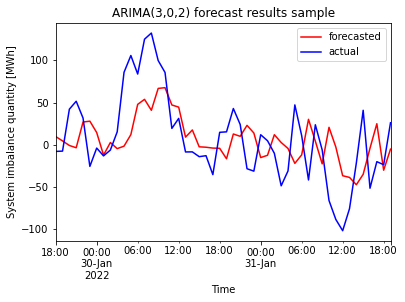

In [11]:
df_arima.iloc[9450:9500,0].plot(label='forecasted', c='red')
df_arima.iloc[9450:9500, 1].plot(label='actual', c='b')
plt.legend()
plt.title('ARIMA(3,0,2) forecast results sample')
plt.xlabel('Time')
plt.ylabel("System imbalance quantity [MWh]")
plt.show()

In [12]:
forecasted = df_arima.forecasted
actual = df_arima.actual

In [13]:
rmse = round(np.sqrt(mean_squared_error(actual, forecasted)), 2)
# mape = round(np.mean(np.abs(forecasted - actual)/np.abs(actual)), 2)
mae = round(np.mean(np.abs(forecasted - actual)), 2)
accuracy= calculate_directional_accuracy(df_arima)


error_metrics = {'rmse': rmse, 'mae': mae, 'Directional accuracy': accuracy}

Accuracy ratio: 0.6759


In [14]:
error_metrics

{'rmse': 64.63, 'mae': 49.56, 'Directional accuracy': 0.6759}

## Exponential smoothing forecast

In [15]:
df_es = pd.read_excel('../forecast_analysis/exponential-smoothing_results.xlsx')
df_es.iloc[:, 0] = pd.to_datetime(df_es.iloc[:, 0])
df_es.index = df_es.iloc[:, 0]  # Change the col to index with datetimes, instead of integers!
df_es.drop('Unnamed: 0', axis=1, inplace=True)

# df_es_reduced = remove_small_actuals(df_es)

In [16]:
forecasted = df_es.forecasted
actual = df_es.actual

In [17]:
rmse = round(np.sqrt(mean_squared_error(actual, forecasted)), 2)
mape = round(np.mean(np.abs(forecasted - actual)/np.abs(actual)), 2)
mae = round(np.mean(np.abs(forecasted - actual)), 2)

accuracy= calculate_directional_accuracy(df_es)

Accuracy ratio: 0.6676


In [18]:
error_metrics = {'rmse': rmse, 'mae': mae, 'Directional accuracy': accuracy}

In [19]:
error_metrics

{'rmse': 72.56, 'mae': 55.17, 'Directional accuracy': 0.6676}

## LSTM forecast results

These forecasts are obtained from MATLAB, and the model is trained with a bit larger dataset.

In [20]:
df_lstm_1 = pd.read_excel('../forecast_analysis/LSTM_results_1024hidden_150epoch_0.1learning.xlsx')
df_lstm_1.iloc[:, 0] = pd.to_datetime(df_lstm_1.iloc[:, 0])
df_lstm_1.index = df_lstm_1.iloc[:, 0]  # Change the col to index with datetimes, instead of integers!
df_lstm_1.drop('Unnamed: 0', axis=1, inplace=True)

df_lstm_1.dropna(inplace=True)

df_lstm_2 = pd.read_excel('../forecast_analysis/LSTM_results_1024hidden_150epoch_0.001learning.xlsx')
df_lstm_2.iloc[:, 0] = pd.to_datetime(df_lstm_2.iloc[:, 0])
df_lstm_2.index = df_lstm_2.iloc[:, 0]  # Change the col to index with datetimes, instead of integers!
df_lstm_2.drop('Unnamed: 0', axis=1, inplace=True)

df_lstm_2.dropna(inplace=True)
                 
df_lstm_3 = pd.read_excel('../forecast_analysis/LSTM_results_1024hidden_100epoch_0.001learning.xlsx')
df_lstm_3.iloc[:, 0] = pd.to_datetime(df_lstm_3.iloc[:, 0])
df_lstm_3.index = df_lstm_3.iloc[:, 0]  # Change the col to index with datetimes, instead of integers!
df_lstm_3.drop('Unnamed: 0', axis=1, inplace=True)

df_lstm_3.dropna(inplace=True)
# df_lstm_reduced = remove_small_actuals(df_lstm)

In [21]:
forecasted_1 = df_lstm_1.forecasted
actual_1 = df_lstm_1.actual

forecasted_2 = df_lstm_2.forecasted
actual_2 = df_lstm_2.actual

forecasted_3 = df_lstm_3.forecasted
actual_3 = df_lstm_3.actual

In [22]:
rmse_1 = round(np.sqrt(mean_squared_error(actual_1, forecasted_1)), 2)
mae_1 = round(np.mean(np.abs(forecasted_1 - actual_1)), 2)
accuracy_1= calculate_directional_accuracy(df_lstm_1)

rmse_2 = round(np.sqrt(mean_squared_error(actual_2, forecasted_2)), 2)
mae_2 = round(np.mean(np.abs(forecasted_2 - actual_2)), 2)
accuracy_2 = calculate_directional_accuracy(df_lstm_2)

rmse_3 = round(np.sqrt(mean_squared_error(actual_3, forecasted_3)), 2)
mae_3 = round(np.mean(np.abs(forecasted_3 - actual_3)), 2)
accuracy_3 = calculate_directional_accuracy(df_lstm_3)

Accuracy ratio: 0.8229
Accuracy ratio: 0.7757
Accuracy ratio: 0.8153


In [23]:
error_metrics1 = {'rmse': rmse_1, 'mae': mae_1, 'Directional accuracy': accuracy_1}
error_metrics2 = {'rmse': rmse_2, 'mae': mae_2, 'Directional accuracy': accuracy_2}
error_metrics3 = {'rmse': rmse_3, 'mae': mae_3, 'Directional accuracy': accuracy_3}

Epochs 150  
Optimizer Adam  
Learning rate 0.1  
Hidden vector size   1024

In [24]:
error_metrics1

{'rmse': 46.23, 'mae': 34.93, 'Directional accuracy': 0.8229}

Epochs 150  
Optimizer Adam  
Learning rate 0.001  
Hidden vector size   1024

In [25]:
error_metrics2

{'rmse': 52.39, 'mae': 39.77, 'Directional accuracy': 0.7757}

Epochs 100  
Optimizer Adam  
Learning rate 0.001  
Hidden vector size   1024

In [26]:
error_metrics3

{'rmse': 50.55, 'mae': 37.25, 'Directional accuracy': 0.8153}

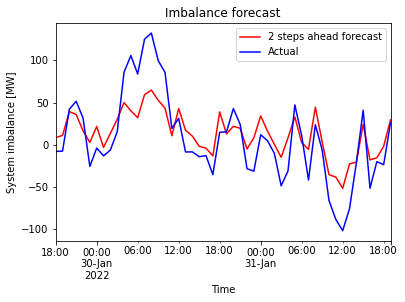

In [27]:
df_lstm_1.iloc[9450:9500,0].plot(label='2 steps ahead forecast', c='red')
# df_arima.iloc[9450:9500,0].plot(label='2 steps ahead ARIMA', c='green')
df_lstm_1.iloc[9450:9500, 1].plot(label='Actual', c='b')

plt.title('Imbalance forecast')
plt.ylabel("System imbalance [MW]")
plt.xlabel('Time')
plt.legend()

plt.savefig('LSTM_example_slides.png', dpi=300)

----